In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt









In [2]:


# qwen_8b_files = [
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/reevals/qwen3-8b-base/Qwen2.5-7B/ifg_0.5_0.3/comments_rse.json",
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/reevals/qwen3-8b-base/Qwen2.5-7B/ifg_0.7_0.5/comments_rse.json",
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/reevals/qwen3-8b-base/Qwen2.5-7B/ifg_1.0_0.7/comments_rse.json",
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/reevals/qwen3-8b-base/Qwen2.5-7B/ifg_1.2_0.7/comments_rse.json"
#     ]

qwen_8b_files = [
    "/mount/IFG/data/new_evals/qwen3-8b-base/Qwen2.5-7B/ifg_0.5_0.3/comments_rse.json",
    "/mount/IFG/data/new_evals/qwen3-8b-base/Qwen2.5-7B/ifg_0.7_0.5/comments_rse.json",
    "/mount/IFG/data/new_evals/qwen3-8b-base/Qwen2.5-7B/ifg_1.0_0.7/comments_rse.json",
    "/mount/IFG/data/new_evals/qwen3-8b-base/Qwen2.5-7B/ifg_1.2_0.7/comments_rse.json"
    ]

llama_8b_files = [
"/mount/IFG/data/generated_responses/reddit_comments/Qwen2.5-7B/ifg_0.5_0.3/comments.json",
"/mount/IFG/data/generated_responses/reddit_comments/Qwen2.5-7B/ifg_0.7_0.5/comments.json",
"/mount/IFG/data/generated_responses/reddit_comments/Qwen2.5-7B/ifg_1.0_0.7/comments.json",
"/mount/IFG/data/generated_responses/reddit_comments/Qwen2.5-7B/ifg_1.2_0.7/comments.json"]

# gemma_3_12b_files = [
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_0.5_0.3/comments_rse.json",
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_0.7_0.5/comments_rse.json",
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_1.0_0.7/comments_rse.json",
#     "/mount/IFG/data/generated_responses/reddit_comments/re_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_1.2_0.7/comments_rse.json"
#     ]

gemma_3_12b_files = [
    "/mount/IFG/data/new_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_0.5_0.3/comments_rse.json",
    "/mount/IFG/data/new_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_0.7_0.5/comments_rse.json",
    "/mount/IFG/data/new_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_1.0_0.7/comments_rse.json",
    "/mount/IFG/data/new_evals/gemma-3-12b-pt/Qwen2.5-7B/ifg_1.2_0.7/comments_rse.json"
    ]

file_paths = {
    "qwen_8b": qwen_8b_files,
    "llama_8b": llama_8b_files,
    "gemma_3_12b": gemma_3_12b_files
}

import json

data = {}

for model, files in file_paths.items():
    data[model] = []
    for file in files:
        with open(file, 'r') as f:
            data[model].append(json.load(f))



In [3]:
print(data.keys())


dict_keys(['qwen_8b', 'llama_8b', 'gemma_3_12b'])


In [4]:
entropies = {}

for model in data.keys():
    entropies[model] = []
    for temperature_data in data[model]:
        entropies[model].extend(
            temperature_data['keywords']['entropies']
            )











In [5]:
from scipy import stats
import itertools

# Calculate correlations between all pairs of models
correlations = {}
for model1, model2 in itertools.product(entropies.keys(), entropies.keys()):

    print(model1, model2)
    correlation, p_value = stats.pearsonr(entropies[model1], entropies[model2])
    correlations[f"{model1}_vs_{model2}"] = {
        "correlation": correlation,
        "p_value": p_value
    }

# Print results
for pair, stats_dict in correlations.items():
    print(f"\n{pair}:")
    print(f"Correlation: {stats_dict['correlation']:.3f}")
    print(f"P-value: {stats_dict['p_value']:.3e}")


qwen_8b qwen_8b
qwen_8b llama_8b
qwen_8b gemma_3_12b
llama_8b qwen_8b
llama_8b llama_8b
llama_8b gemma_3_12b
gemma_3_12b qwen_8b
gemma_3_12b llama_8b
gemma_3_12b gemma_3_12b

qwen_8b_vs_qwen_8b:
Correlation: 1.000
P-value: 0.000e+00

qwen_8b_vs_llama_8b:
Correlation: 0.658
P-value: 4.886e-51

qwen_8b_vs_gemma_3_12b:
Correlation: 0.376
P-value: 6.799e-15

llama_8b_vs_qwen_8b:
Correlation: 0.658
P-value: 4.886e-51

llama_8b_vs_llama_8b:
Correlation: 1.000
P-value: 0.000e+00

llama_8b_vs_gemma_3_12b:
Correlation: 0.306
P-value: 3.834e-10

gemma_3_12b_vs_qwen_8b:
Correlation: 0.376
P-value: 6.799e-15

gemma_3_12b_vs_llama_8b:
Correlation: 0.306
P-value: 3.834e-10

gemma_3_12b_vs_gemma_3_12b:
Correlation: 1.000
P-value: 0.000e+00


In [6]:
# Create markdown table of mean entropies
models = list(entropies.keys())
table = "| Model | " + " | ".join(models) + " |\n"
table += "|" + "---|" * (len(models) + 1) + "\n"

for model1 in models:
    row = f"| {model1} |"
    for model2 in models:
        corr = correlations[f"{model1}_vs_{model2}"]["correlation"]
        row += f" {corr:.3f} |"
    table += row + "\n"

print(table)
from IPython.display import Markdown
display(Markdown(table))


| Model | qwen_8b | llama_8b | gemma_3_12b |
|---|---|---|---|
| qwen_8b | 1.000 | 0.658 | 0.376 |
| llama_8b | 0.658 | 1.000 | 0.306 |
| gemma_3_12b | 0.376 | 0.306 | 1.000 |



| Model | qwen_8b | llama_8b | gemma_3_12b |
|---|---|---|---|
| qwen_8b | 1.000 | 0.658 | 0.376 |
| llama_8b | 0.658 | 1.000 | 0.306 |
| gemma_3_12b | 0.376 | 0.306 | 1.000 |


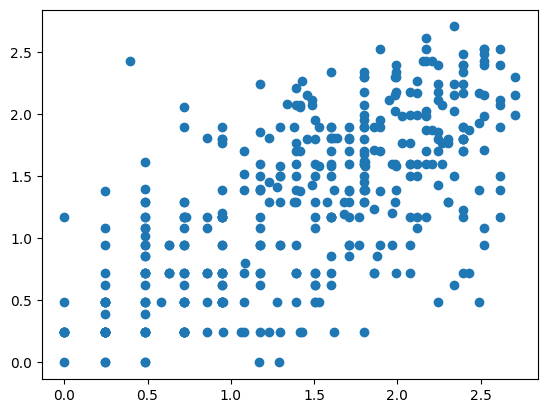

In [11]:
plt.scatter(entropies['qwen_8b'], entropies['llama_8b'])









In [8]:
data1['keywords']['mean_entropy'], data2['keywords']['mean_entropy']












NameError: name 'data1' is not defined